<a href="https://colab.research.google.com/github/gabrielatrindade/quarentenadados-alura/blob/master/Aula01_02_Introducao_Analises_Visualizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt


# Aula 1

## Introdução

Nesse trecho vamos só mostrar que o notebook interpreta/roda código python

In [0]:
print('Gabriela')
print ('Emmerson')

Gabriela
Emmerson


In [0]:
nome_do_filme = 'Totoro, o filme'

In [0]:
print(nome_do_filme)

Totoro, o filme


In [0]:
nome_do_filme

'Totoro, o filme'

## Lendo os dados do MovieLens

Vamos carregar os arquivos de amostras do MovieLens. Você pode baixar e utilizar uma versão mais recente se preferir.

In [0]:
import pandas as pd

In [0]:
filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
# Lendo a documentação a partir do notebook
?filmes#.head

In [0]:
avaliacoes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv')
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Exploração inicial

In [0]:
avaliacoes.shape

(100836, 4)

In [0]:
len(avaliacoes)

100836

In [0]:
avaliacoes.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
avaliacoes_filme_1 = avaliacoes.query('filmeId==1')
avaliacoes_filme_1.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [0]:
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [0]:
avaliacoes['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [0]:
#avaliacoes.query('filmeId==1').describe()
avaliacoes_filme_1.describe()

,usuarioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


In [0]:
#avaliacoes.query('filmeId==1')['nota'].mean()
avaliacoes_filme_1['nota'].mean()

3.9209302325581397

Tirando a média de cada filme primeiro para depois juntar com a tabela de nome. Se fizesse ao contrário, juntar pra depois tirar a média, o nome de cada filme ia aparecer várias vezes (sem necessidade) e ocupar memória.

In [0]:
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
avaliacoes.groupby('filmeId')

In [0]:
medias_notas_por_filme = avaliacoes.groupby('filmeId')['nota'].mean()
medias_notas_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [0]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Refletindo sobre as médias ou qualquer resultado de um sample ou de um dataset todo:
Essa média é uma verdade pra esse dataset, entretanto é uma hipótese pra toda a população, mesmo que aplicado ao dataset inteiro (não ao sample). Pra saber se será verdade é preciso analisar estatisticamente através de gráficos.


A exploração de dados é a fase que levantamos essas hipóteses. Após fazer essa análise, testamos ela.

https://en.wikipedia.org/wiki/Exploratory_data_analysis

O objetivo é separar o levantamento de hipóteses e o teste de hipóteses.

In [0]:
filmes_com_media = filmes.join(medias_notas_por_filme, on='filmeId')
filmes_com_media = filmes_com_media.rename(columns={'nota':'medias'})
filmes_com_media.head()

,filmeId,titulo,generos,medias
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [0]:
filmes_com_media.sort_values('medias', ascending=False).head(15)

,filmeId,titulo,generos,medias
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


In [0]:
avaliacoes.query('filmeId in [1, 2, 102084]')

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
560,6,2,4.0,845553522
874,7,1,4.5,1106635946
1026,8,2,4.0,839463806
...,...,...,...,...
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
98667,608,2,2.0,1117490786
99497,609,1,3.0,847221025


Reflexão sobre as notas:

Um certo filme A com 1000 notas 3 terá sua média 3.
Outro filme B com 500 notas 1 e 500 notas 5, também terá a média 3.

Mas isso significa coisas diferentes. O filme A foi considerado OK. Enquanto que o filme B é adorado ou odiado pelas pessoas.

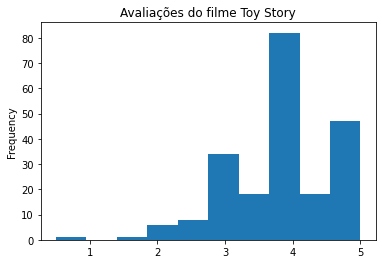

In [0]:
import matplotlib.pyplot as plt

avaliacoes.query('filmeId == 1')['nota'].plot(kind='hist',
                                              title='Avaliações do filme Toy Story')

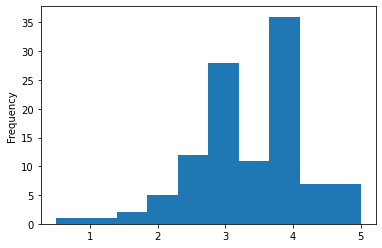

In [0]:
avaliacoes.query('filmeId == 2')['nota'].plot(kind='hist')

Veja que a nota do 102084 é 5, mas somente porque uma única pessoa avaliou.

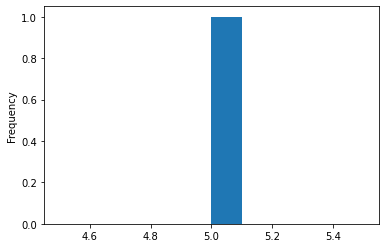

In [0]:
avaliacoes.query('filmeId == 102084')['nota'].plot(kind='hist')

## Desafios

### Desafio 1: encontre os 18 filmes que não tiveram avaliação

In [0]:
filmes_com_media.tail()

,filmeId,titulo,generos,medias
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.5
9739,193585,Flint (2017),Drama,3.5
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.5
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,4.0


In [0]:
filmes_com_media[filmes_com_media[['medias']].isnull().any(1)]#.count()

,filmeId,titulo,generos,medias
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


### Desafio 2: mudar o nome da coluna nota para media após o join

In [0]:
# I already did it after the join
filmes_com_media = filmes_com_media.rename(columns={'nota':'medias'})

### Desafio 3: colocar quantas avaliações o filme teve

In [0]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
qnt_avaliacoes_por_filme = avaliacoes.groupby('filmeId')['usuarioId'].count()
qnt_avaliacoes_por_filme.head()

filmeId
1    215
2    110
3     52
4      7
5     49
Name: usuarioId, dtype: int64

In [0]:
filmes_media_e_qnt_avaliacoes = filmes_com_media.merge(qnt_avaliacoes_por_filme, on='filmeId')
filmes_media_e_qnt_avaliacoes = filmes_media_e_qnt_avaliacoes.rename(columns={'usuarioId':'qnt_avaliacoes'})
filmes_media_e_qnt_avaliacoes.head()

,filmeId,titulo,generos,medias,qnt_avaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49


### Desafio 4: arrendondar a média para 2 casas decimais

In [0]:
filmes_com_media_round = filmes_com_media.round(decimals=2)
filmes_com_media_round.head()

,filmeId,titulo,generos,medias
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07


### Desafio 5: quantos gêneros tem, quais são eles

In [0]:
df_generos = (filmes['generos'].str.split(pat='|')
                .apply(pd.Series).stack().reset_index(drop=True)
                .to_frame(name='generos'))

df_generos['generos'].unique()

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

In [0]:
# maneira simples visto em outra resolução
generos_df = filmes.generos.str.get_dummies('|')
generos = generos_df.columns.to_list()

generos

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

### Desafio 6: contar quantos vezes cada gênero aparece

In [0]:
qnt_cada_genero = df_generos.groupby('generos')['generos'].count()
qnt_cada_genero

generos
(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
Name: generos, dtype: int64

In [0]:
# maneira simples visto em outra resolução
generos_df.sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

### Desafio 7: plotar o gráfico de barra de aparições por gênero

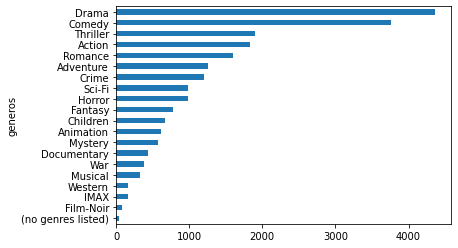

In [0]:
qnt_cada_genero.sort_values(ascending=True).plot(kind='barh')

# Aula 2

## Falando de médias e do desafio anterior

Dois filmes podem ter a mesma média, entretanto com distribuição de notas diferentes.
Quando resumimos informações a média, por exemplo, perdemos dados por trás disso que poderia levar a conclusões diferentes, como a distribuição de notas que aquele filme levou. Então devemos escolher como vamos enxergar nossos dados.
Desvio Padrão? Qual melhor gráfico?

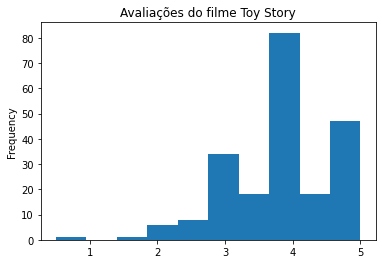

In [0]:
avaliacoes.query('filmeId == 1')['nota'].plot(kind='hist',
                                              title='Avaliações do filme Toy Story')

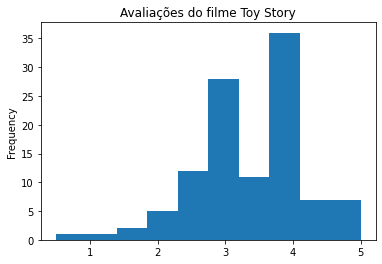

In [0]:
avaliacoes.query('filmeId == 2')['nota'].plot(kind='hist',
                                              title='Avaliações do filme Toy Story')

In [0]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
filmes['generos'].str.get_dummies('|')

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

quantidade de gênero x quantidade de filme

1 filme com 10 gêneros

In [0]:
filmes['generos'].str.get_dummies('|').sum(axis=1).value_counts()

2     3218
1     2851
3     2338
4      987
5      271
6       63
7       12
10       1
8        1
dtype: int64

In [0]:
filmes['generos'].str.get_dummies('|').sum().index

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')

In [0]:
filmes['generos'].str.get_dummies('|').sum().values

array([  34, 1828, 1263,  611,  664, 3756, 1199,  440, 4361,  779,   87,
        978,  158,  334,  573, 1596,  980, 1894,  382,  167])

In [0]:
filmes['generos'].str.get_dummies('|').sum().sort_index()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

## Gráficos

In [0]:
generos_e_qnt_filmes = (filmes['generos'].str.get_dummies('|')
                        .sum().sort_values(ascending=False))

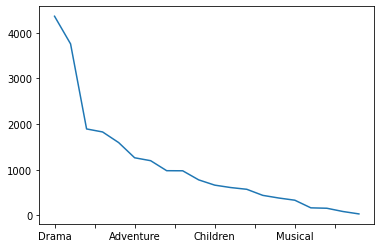

In [0]:
# não faz sentido
generos_e_qnt_filmes.plot()

Perceba a dificuldade de analisar um gráfico de pizza, visto que não é fácil definir qual area é maior ou o quão mais ela é maior comparada a outra área. <br>
No exemplo abaixo, o gráfico de pizza nem sequer apresenta valores absolutos.

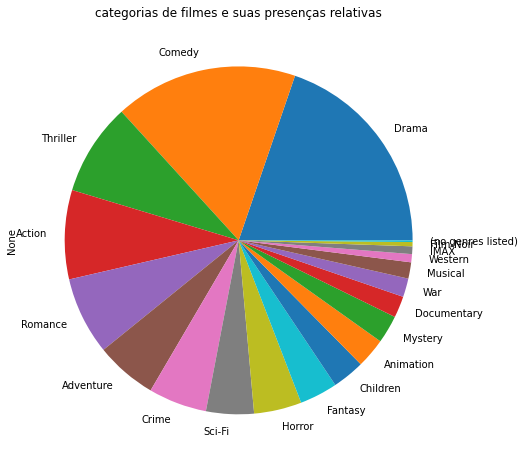

In [0]:
generos_e_qnt_filmes.plot(
    kind='pie', 
    title='categorias de filmes e suas presenças relativas',
    figsize=(8,8))

plt.show()

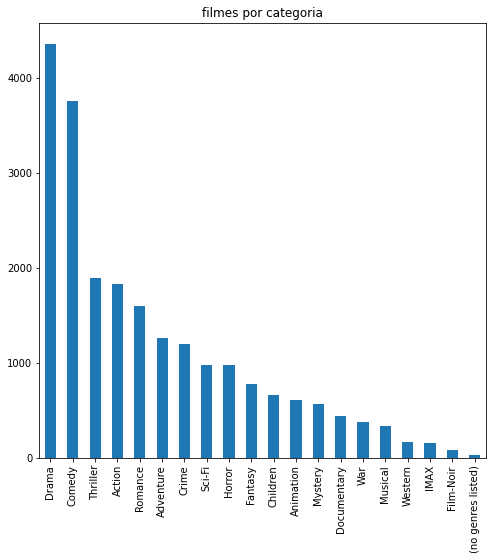

In [0]:
generos_e_qnt_filmes.plot(
    kind='bar', 
    title='filmes por categoria',
    figsize=(8,8))

plt.show()

Vamos acrescentar mais um dimensão: cor. <br>
Cada dimensão pode ser acrescentado pra contar uma história diferente ou pra reforçar alguma outra mensagem. Por exemplo, podíamos pintar cada barra de uma cor diferente, pra mostrar que são coisas diferentes; ou simplesmente usar um degradê, pra demonstrar a diferença em termos de quantidade de uma barra com as demais.

In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


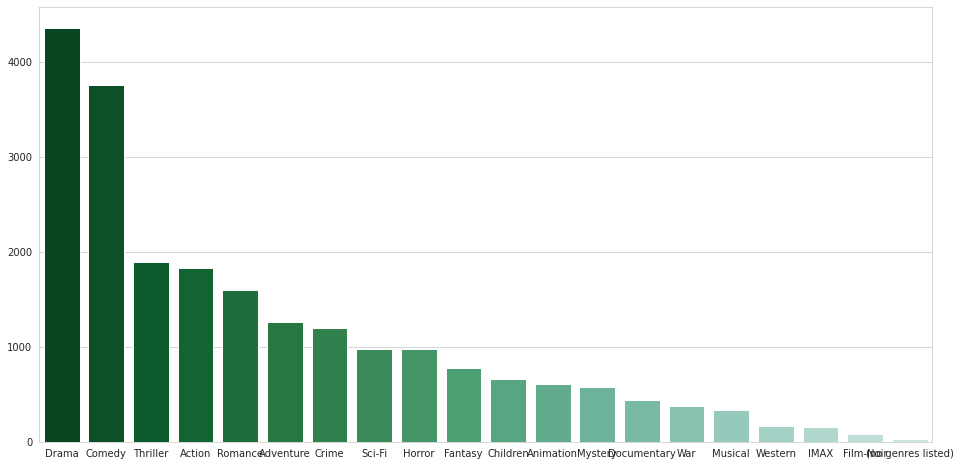

In [0]:
x = generos_e_qnt_filmes.index
y = generos_e_qnt_filmes.values

sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.barplot(
    x,y,palette=sns.color_palette(
        'BuGn_r', 
        n_colors=len(generos_e_qnt_filmes)+6))

plt.show()

## Vamos refletir novamente sobre o significado de média vs mediana. 

Imagina que uma cidade com a população = 1000. <br>

ter o salário de todos = 1000 <br>
a média do salário será 1000.
mediana 1000.

ter o salário de 1 pessoa = 1.000.000
e de 999 pessoas = 1, <br>
a média do salário será aproximadamente 1001. 
mediana 1.

Ou seja, quase igual a média de salário do primeiro caso.
Mas perceba que a desigualdade no segundo caso é enorme entre o salário de uma pessoa e de todo o resto.
Logo, a média pode ser perigosa em algumas distribuições.

Já a mediana mostra diferente. Mostra que a partir do número central, metade da população recebe menos que aquilo, e a outra metade recebe mais.

Quando comparamos a mediana e média dos dois casos, percebemos que no primeiro caso provavelmente está bem distribuído.

3.9209302325581397


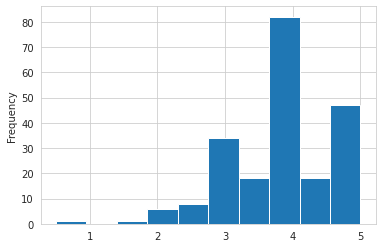

In [0]:
print(avaliacoes_filme_1['nota'].mean())
avaliacoes_filme_1['nota'].plot(kind='hist')

3.4318181818181817


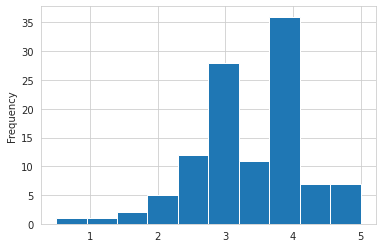

In [0]:
avaliacoes_filme_2 = avaliacoes.query('filmeId == 2')
print(avaliacoes_filme_2['nota'].mean())
avaliacoes_filme_2['nota'].plot(kind='hist')

In [0]:
avaliacoes_filme_1['nota'].describe()

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: nota, dtype: float64

In [0]:
avaliacoes_filme_2['nota'].describe()

count    110.000000
mean       3.431818
std        0.881713
min        0.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: nota, dtype: float64

In [0]:
avaliacoes.groupby('filmeId')['nota'].mean()

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [0]:
filmes_com_media.sort_values('medias', ascending=False)[2450:2500]

,filmeId,titulo,generos,medias
745,973,Meet John Doe (1941),Comedy|Drama,3.900000
6632,56251,Futurama: Bender's Big Score (2007),Animation|Comedy|Sci-Fi,3.900000
101,116,Anne Frank Remembered (1995),Documentary,3.900000
5719,27846,"Corporation, The (2003)",Documentary,3.900000
802,1050,Looking for Richard (1996),Documentary|Drama,3.900000
3983,5617,Secretary (2002),Comedy|Drama|Romance,3.900000
1323,1785,King of New York (1990),Crime|Thriller,3.900000
7103,70599,"Time Traveler's Wife, The (2009)",Drama|Romance|Sci-Fi,3.900000
5248,8607,Tokyo Godfathers (2003),Adventure|Animation|Drama,3.900000
4677,6985,"Passion of Joan of Arc, The (Passion de Jeanne...",Drama,3.900000


In [0]:
def plota_filme (n):
  avaliacoes_filme = avaliacoes.query(f'filmeId == {n}')
  avaliacoes_filme['nota'].plot(kind='hist')
  print(avaliacoes_filme['nota'].describe())

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64


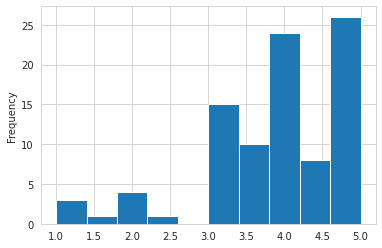

In [0]:
plota_filme(919)

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64


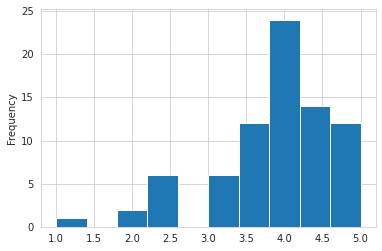

In [0]:
plota_filme(46578)

In [0]:
def plota_filme (n):
  avaliacoes_filme = avaliacoes.query(f'filmeId == {n}')
  avaliacoes_filme['nota'].plot(kind='hist')
  plt.show()
  avaliacoes_filme['nota'].plot.box()
  plt.show()
  print(avaliacoes_filme['nota'].describe())

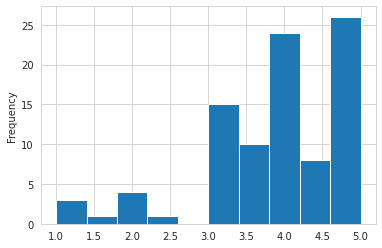

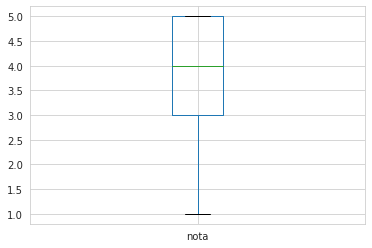

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64


In [0]:
plota_filme(919)

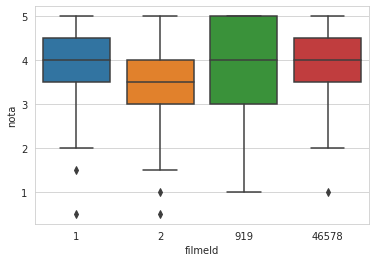

In [0]:
sns.boxplot(data = avaliacoes.query('filmeId in [1,2,919,46578]'),
            x = 'filmeId',
            y = 'nota')

## Desafios

### Desafio 1: rotacionar os ticks (nome dos generos) 

-(desconsiderar)-
Desafio 1: colocar os valores absolutos de cada barra no gráfico

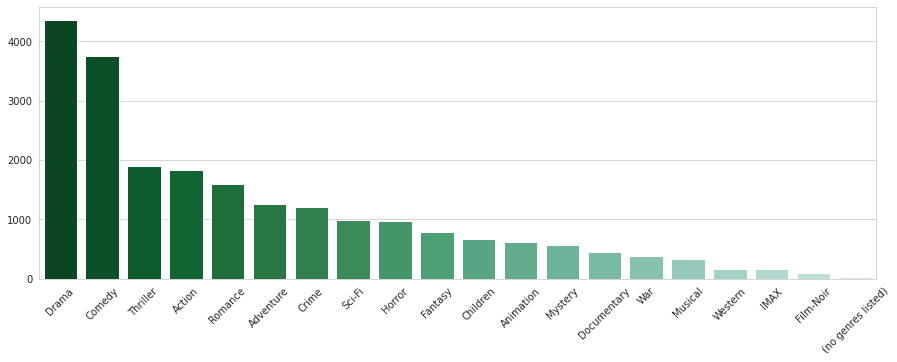

In [0]:
x = generos_e_qnt_filmes.index
y = generos_e_qnt_filmes.values

sns.set_style('whitegrid')
plt.figure(figsize=(15,5))

(sns.barplot(x,y,
        palette=sns.color_palette('BuGn_r', n_colors=len(generos_e_qnt_filmes)+6))
    .set_xticklabels(rotation=45, labels=x))

#plt.xticks(rotation=45)
plt.show()

### Desafio 2: comparar filmes com médias próximas e achar distribuições bem diferentes

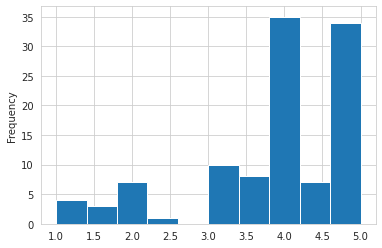

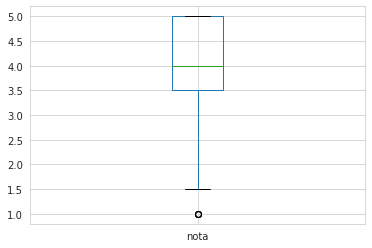

count    109.000000
mean       3.894495
std        1.103600
min        1.000000
25%        3.500000
50%        4.000000
75%        5.000000
max        5.000000
Name: nota, dtype: float64


In [0]:
plota_filme(924) # 2001: A Space Odyssey (1968)

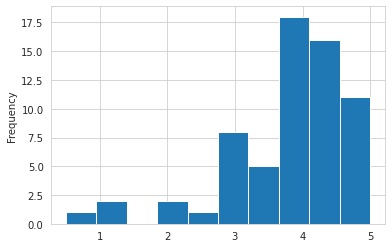

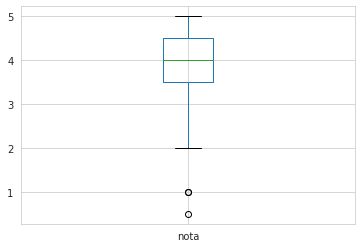

count    64.000000
mean      3.898438
std       1.008612
min       0.500000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64


In [0]:
plota_filme(55820) # No Country for Old Men (2007)

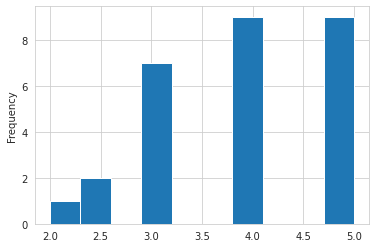

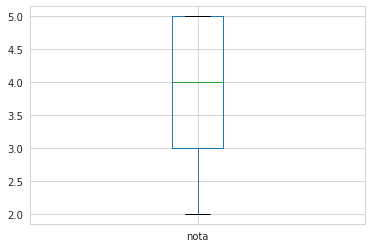

count    28.000000
mean      3.892857
std       0.946310
min       2.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64


In [0]:
plota_filme(2150) # Gods Must Be Crazy, The (1980)

### Desafio 3: fazer o boxplot dos 10 filmes com mais votos

In [0]:
dez_filmes_mais_votados = (filmes_media_e_qnt_avaliacoes
                            .sort_values('qnt_avaliacoes', ascending=False)
                            [['filmeId', 'titulo']]
                            .head(10))
dez_filmes_mais_votados

,filmeId,titulo
314,356,Forrest Gump (1994)
277,318,"Shawshank Redemption, The (1994)"
257,296,Pulp Fiction (1994)
510,593,"Silence of the Lambs, The (1991)"
1938,2571,"Matrix, The (1999)"
224,260,Star Wars: Episode IV - A New Hope (1977)
418,480,Jurassic Park (1993)
97,110,Braveheart (1995)
507,589,Terminator 2: Judgment Day (1991)
461,527,Schindler's List (1993)


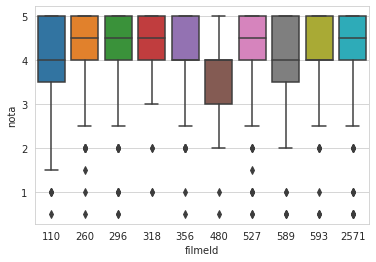

In [0]:
sns.boxplot(data = avaliacoes.merge(dez_filmes_mais_votados, on='filmeId'),
            x = 'filmeId',
            y = 'nota')

### Desafio 4: Colocar o box em um tamanho adequado e com o nome dos filmes nos ticks

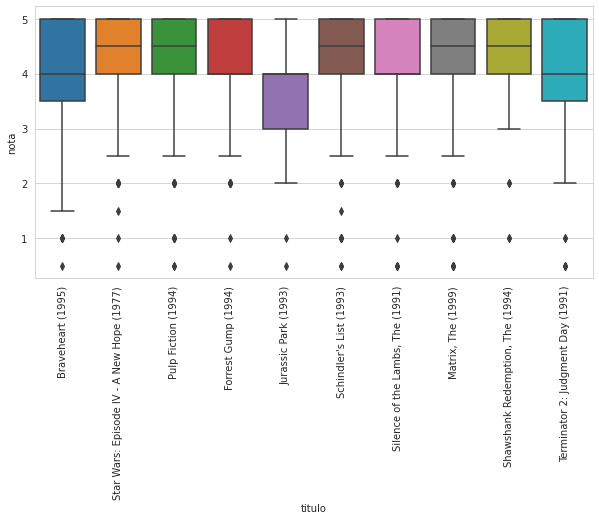

In [0]:
plt.figure(figsize=(10,5))

(sns.boxplot(data = avaliacoes.merge(dez_filmes_mais_votados, on='filmeId'),
            x = 'titulo',
            y = 'nota'))

plt.xticks(rotation=90)
plt.show()

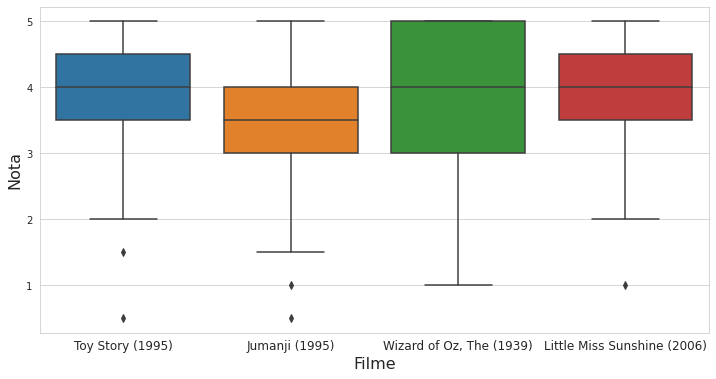

In [0]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x="filmeId", y="nota")

ax.set_xticklabels(filmes.query("filmeId in [1,2,919,46578]")['titulo'], fontsize=12)
ax.set_xlabel("Filme", fontsize=16)
ax.set_ylabel("Nota", fontsize=16)
plt.show()

### Desafio 5: calcular moda, media e mediana dos filmes. Explorar filmes com notas mais próximas de 0.5, 3 e 5

In [0]:
medias_notas_por_filme = avaliacoes.groupby('filmeId')['nota'].mean().rename('media')
medianas_notas_por_filme = avaliacoes.groupby('filmeId')['nota'].median().rename('mediana')
modas_notas_por_filme = avaliacoes.groupby('filmeId')['nota'].apply(lambda x: x.mode().iloc[0]).rename('moda')

In [0]:
modas_notas_por_filme.head()

filmeId
1    4.0
2    4.0
3    3.0
4    3.0
5    3.0
Name: moda, dtype: float64

In [0]:
filmes_averages = (filmes.join(medias_notas_por_filme, on='filmeId')
                         .join(medianas_notas_por_filme, on='filmeId')
                         .join(modas_notas_por_filme, on='filmeId'))

In [0]:
filmes_averages.head()

,filmeId,titulo,generos,media,mediana,moda
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,4.0,4.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,3.5,4.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,3.0,3.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,3.0,3.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,3.0,3.0


Resolução do desafio

In [0]:
def explora_filme(filme_id):
    filme = filmes.query(f'filmeId == {filme_id}')
    notas = avaliacoes.query(f'filmeId == {filme_id}')['nota']
    
    print(f'Filme: {filme.iloc[0, 1]}')
    print()
    
    print(f'Moda: {notas.mode().values}')    
    print(f'Média: {notas.mean()}')
    print(f'Mediana: {notas.median()}')
    print('------------')

In [0]:
explora_filme(8387)
explora_filme(89386)
explora_filme(3774)

Filme: Police Academy: Mission to Moscow (1994)

Moda: [0.5]
Média: 0.8
Mediana: 0.5
------------
Filme: Pearl Jam Twenty (2011)

Moda: [0.5]
Média: 0.5
Mediana: 0.5
------------
Filme: House Party 2 (1991)

Moda: [0.5 1. ]
Média: 0.75
Mediana: 0.75
------------


In [0]:
explora_filme(2041)
explora_filme(7541)
explora_filme(160080)

Filme: Condorman (1981)

Moda: [4.]
Média: 3.3333333333333335
Mediana: 4.0
------------
Filme: 100 Girls (2000)

Moda: [3.5]
Média: 3.25
Mediana: 3.5
------------
Filme: Ghostbusters (2016)

Moda: [3.  3.5]
Média: 3.125
Mediana: 3.25
------------


In [0]:
explora_filme(177593)
explora_filme(1178)
explora_filme(4334)

Filme: Three Billboards Outside Ebbing, Missouri (2017)

Moda: [4.5 5. ]
Média: 4.75
Mediana: 4.75
------------
Filme: Paths of Glory (1957)

Moda: [5.]
Média: 4.541666666666667
Mediana: 4.75
------------
Filme: Yi Yi (2000)

Moda: [5.]
Média: 4.6
Mediana: 5.0
------------


### Desafio 6: Plotar bloxplot e o histograma um do lado do outro (no mesmo gráfico ou em gráficos destintos)

In [0]:
def plota_filme_box_hist (n):
  avaliacoes_filme = avaliacoes.query(f'filmeId == {n}')

  f, axes = plt.subplots(1, 2, figsize=(16, 6))

  avaliacoes_filme['nota'].plot(kind='hist', ax=axes[0])
  avaliacoes_filme['nota'].plot.box(ax=axes[1])

  plt.show()

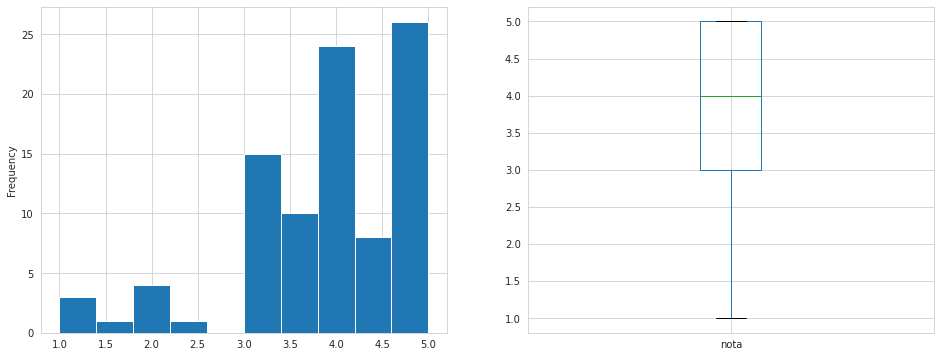

In [0]:
plota_filme_box_hist(919)

### Desafio 7: gráfico de notas médias por ano

In [0]:
filmes_com_media_e_ano = filmes_com_media.copy()
filmes_com_media_e_ano['ano'] = filmes_com_media['titulo'].str.extract("\((\d{4})\)")
filmes_com_media_e_ano.head()

,filmeId,titulo,generos,medias,ano
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,1995
4,5,Father of the Bride Part II (1995),Comedy,3.071429,1995


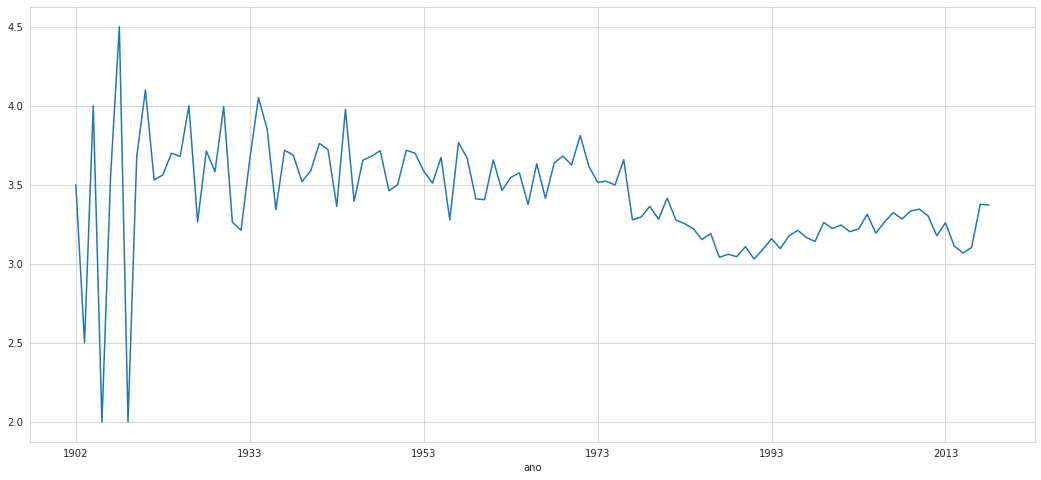

In [0]:
nota_media_por_ano = filmes_com_media_e_ano.groupby('ano')['medias'].mean()

plt.figure(figsize=(18, 8))
nota_media_por_ano.plot()